# 월별 노인 교통 사고
- 출처) 도로교통공단.
1. 노인은 65세 이상임
2. 부상자수는 중상자수，경상자수，부상신고자수의 합계.	

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df = pd.read_csv('data\\month.csv',encoding='CP949',header=1)

In [3]:
df.head()

시군구     합계  01월  02월  03월  04월  05월   06월  07월  08월  ...    03월.9  04월.9  \
0   합계  11640  857  871  868  899  994  1000  928  912  ...     1918   2099   
1  종로구    410   24   30   29   38   27    29   36   37  ...       54     68   
2   중구    381   33   34   28   33   27    36   36   24  ...       56     62   
3  용산구    419   54   30   37   30   31    33   27   31  ...       71     61   
4  성동구    364   25   23   34   29   35    25   31   21  ...       56     68   

   05월.9  06월.9  07월.9  08월.9  09월.9  10월.9  11월.9  12월.9  
0   2257   1990   2090   2194   2178   2501   2582   2259  
1     62     49     62     62     54     86     69     66  
2     84     57     52     65     60     69     73     65  
3     77     73     67     76     58     83     80     69  
4     80     77     62     65     83     82     83     80  

[5 rows x 131 columns]

In [4]:
# 연도별 데이터 쪼개기 (2015~2019)
df_2015 = df.loc[:,'01월.5':'12월.5']
df_2016 = df.loc[:,'01월.6':'12월.6']
df_2017 = df.loc[:,'01월.7':'12월.7']
df_2018 = df.loc[:,'01월.8':'12월.8']
df_2019 = df.loc[:,'01월.9':'12월.9']
df_list = [df_2015, df_2016, df_2017, df_2018, df_2019]

In [5]:
df_2015.head()

01월.5  02월.5  03월.5  04월.5  05월.5  06월.5  07월.5  08월.5  09월.5  10월.5  \
0   1436   1371   1611   1455   1548   1347   1513   1565   1730   1877   
1     41     36     38     42     57     36     45     49     48     68   
2     45     30     82     53     51     46     40     58     49     53   
3     50     51     75     50     56     45     54     53     64     66   
4     52     58     42     37     43     43     59     61     52     75   

   11월.5  12월.5  
0   1758   1693  
1     52     59  
2     64     59  
3     59     56  
4     53     47

In [6]:
df.iloc[1,0]

'종로구'

In [7]:
# 근 5년간 사고 건수가 많은 자치구 Top 5 구하기
df_2015_total = df.loc[:,'합계.5'] 
df_2016_total = df.loc[:,'합계.6'] 
df_2017_total = df.loc[:,'합계.7'] 
df_2018_total = df.loc[:,'합계.8'] 
df_2019_total = df.loc[:,'합계.9'] 

df_total = pd.concat([df_2015_total,df_2016_total,df_2017_total,df_2018_total,df_2019_total], axis=1)
df_total.head()

합계.5   합계.6   합계.7   합계.8   합계.9
0  18904  20254  22101  25163  25983
1    571    617    658    750    732
2    630    615    673    757    766
3    679    695    694    839    840
4    622    616    763    821    862

### 2015~2019 서울시 노인교통사고 건수 증가 

In [8]:
 type(list(df_total.iloc[0]))

list

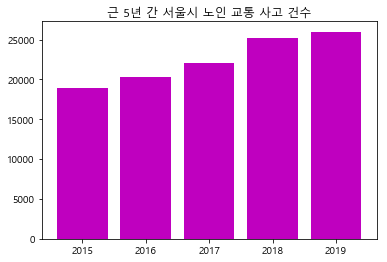

In [9]:
import matplotlib.pyplot as plt
year_list = [2015,2016,2017,2018,2019]
total_list = list(df_total.iloc[0])
plt.bar(year_list, total_list,color = 'm')
plt.title('근 5년 간 서울시 노인 교통 사고 건수')
plt.savefig('img\\5년간_서울시_노인_교통사고건수.png')
plt.show()

In [10]:
df_total['sum'] = df_total.sum(axis=1) # 근 5년간 사고건수 합 컬럼 추가
df_top5 = df_total.sort_values('sum',ascending=False).head(6) # 오름차순 정렬 후 top 5개 골라내기
df_top5.drop(0, inplace=True) # '합계 row' 필터링
df_top5_name = df.iloc[df_top5.index,0]
df_top5_name

16     강남구
19     서초구
18     송파구
13    영등포구
11     강서구
Name: 시군구, dtype: object

In [11]:
df_gu = df['시군구']

In [12]:
df_gu = df_gu.drop(0)
df_gu.to_csv('data\\gu.csv')

In [13]:
df_total = pd.concat([df_total,df_gu], axis=1)

In [14]:
df_total.drop(0, axis=0)

합계.5  합계.6  합계.7  합계.8  합계.9   sum   시군구
1    571   617   658   750   732  3328   종로구
2    630   615   673   757   766  3441    중구
3    679   695   694   839   840  3747   용산구
4    622   616   763   821   862  3684   성동구
5    855   925   898  1001   975  4654  동대문구
6    734   702   794   861   841  3932   성북구
7    521   525   552   621   597  2816   도봉구
8    696   834   751   944   961  4186   은평구
9    547   668   704   765   752  3436  서대문구
10   792   907   994  1095  1170  4958   마포구
11   893  1017  1141  1292  1410  5753   강서구
12   763   765   818   946   985  4277   구로구
13  1022  1124  1203  1349  1341  6039  영등포구
14   675   766   781   899   917  4038   동작구
15   730   722   851   973   870  4146   관악구
16  1377  1505  1786  2124  2263  9055   강남구
17   720   777   869  1031  1116  4513   강동구
18  1043  1112  1264  1475  1575  6469   송파구
19  1220  1333  1479  1756  1845  7633   서초구
20   791   825   897  1103  1087  4703   양천구
21   676   605   748   804   857  3690   중랑구
22   713   830   881   967  1073  4464   노원구
23   644   657   722   715   801  3539   광진구
24   543   588   594   651   663  3039   강북구
25   447   524   586   624   684  2865   금천구

In [15]:
df_total.to_csv('data\\total.csv')

In [16]:
df_top5

합계.5  합계.6  합계.7  합계.8  합계.9   sum
16  1377  1505  1786  2124  2263  9055
19  1220  1333  1479  1756  1845  7633
18  1043  1112  1264  1475  1575  6469
13  1022  1124  1203  1349  1341  6039
11   893  1017  1141  1292  1410  5753

In [17]:
list(df_top5_name.index)

[16, 19, 18, 13, 11]

16
강남구


<Figure size 432x288 with 0 Axes>

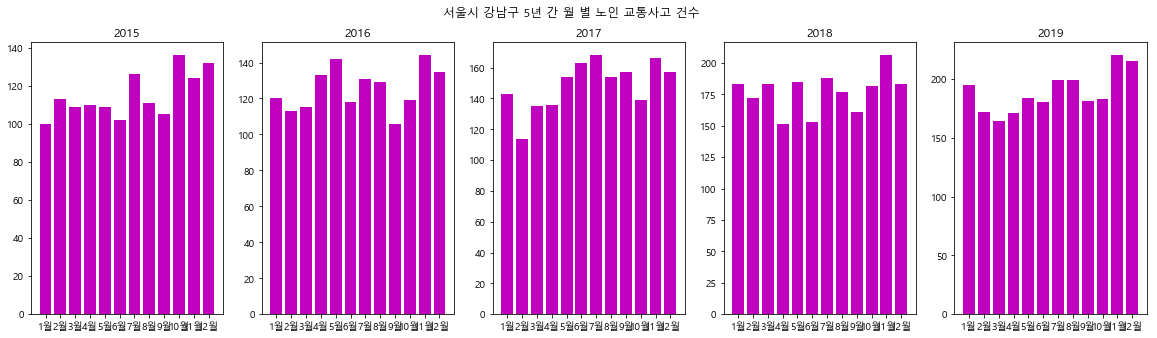

19
서초구


<Figure size 432x288 with 0 Axes>

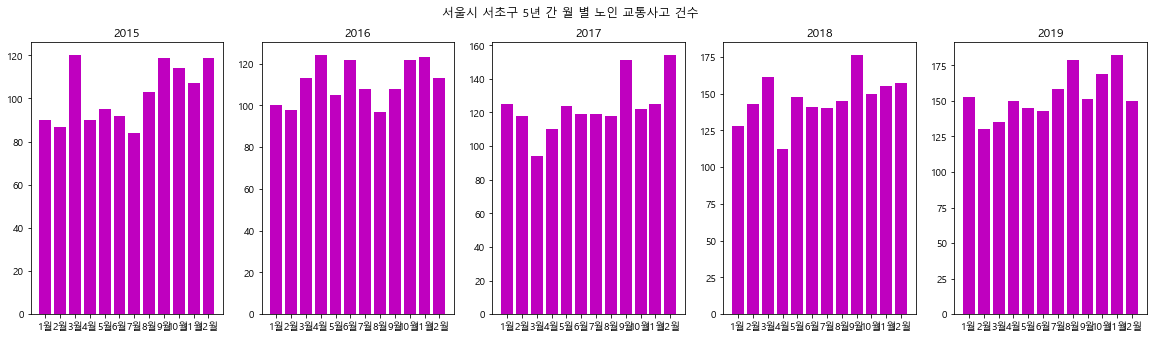

18
송파구


<Figure size 432x288 with 0 Axes>

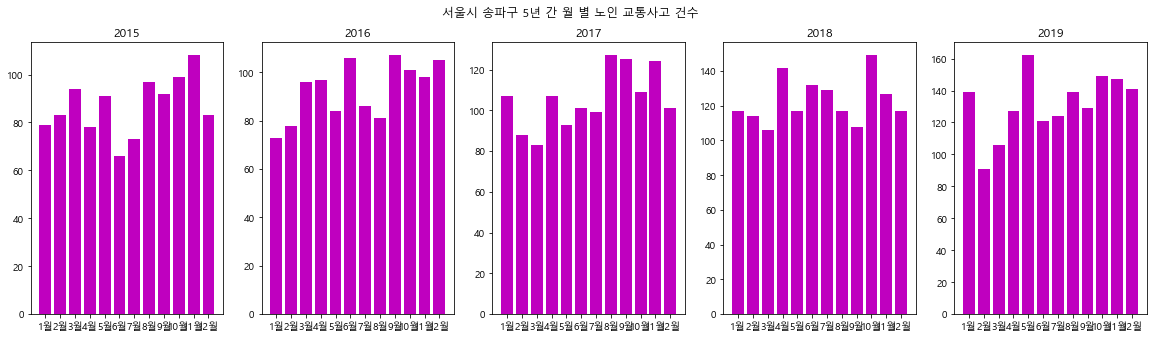

13
영등포구


<Figure size 432x288 with 0 Axes>

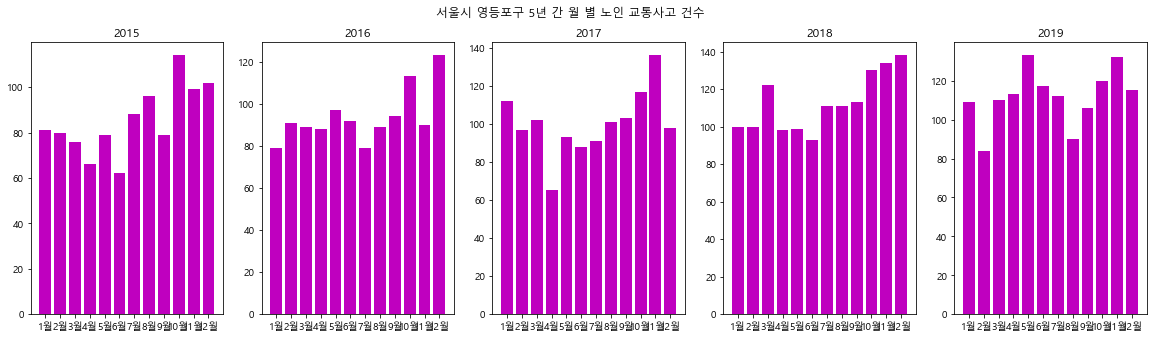

11
강서구


<Figure size 432x288 with 0 Axes>

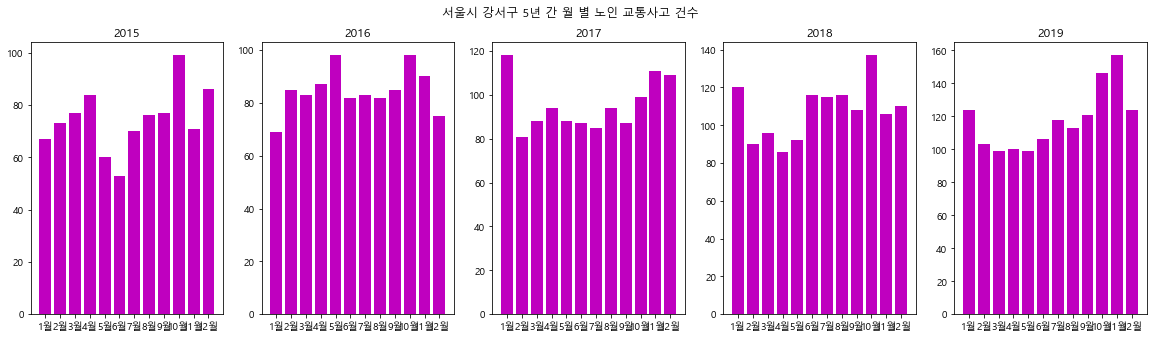

In [23]:

index = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
year_list= [ 2015,2016,2017,2018,2019]

for gu in list(df_top5_name.index):
    print(gu)
    print(df.iloc[gu,0])
    plt.figure()
    plt.figure(figsize=[20,5])
    for i, val in enumerate(year_list):
        plt.subplot(1,5,i+1).set_title(val)
        plt.bar(index, df_list[i].iloc[gu], color='m')
    title = '서울시 {} 5년 간 월 별 노인 교통사고 건수'.format(df.iloc[gu,0])
    plt.suptitle(title)        
    plt.savefig('img\\{}교통사고건수.png'.format(df.iloc[gu,0]))
    plt.show()

2015


<Figure size 432x288 with 0 Axes>

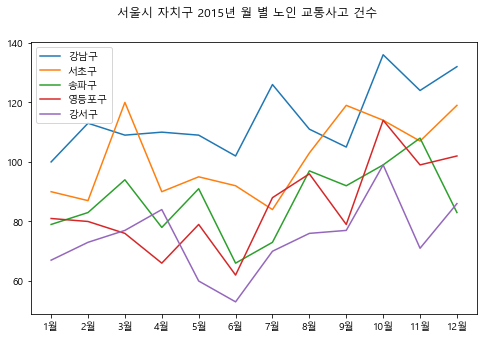

2016


<Figure size 432x288 with 0 Axes>

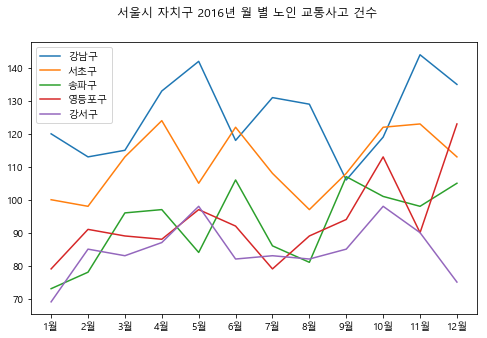

2017


<Figure size 432x288 with 0 Axes>

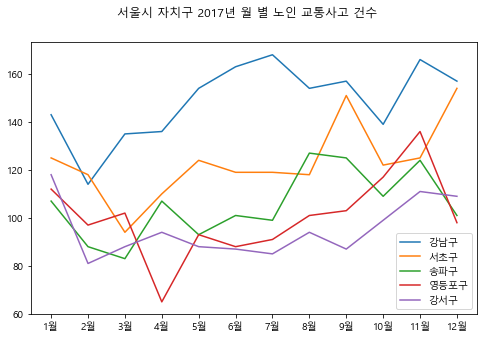

2018


<Figure size 432x288 with 0 Axes>

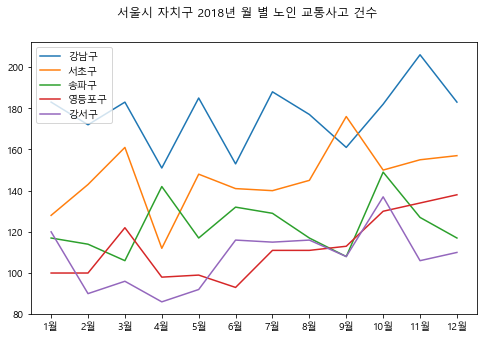

2019


<Figure size 432x288 with 0 Axes>

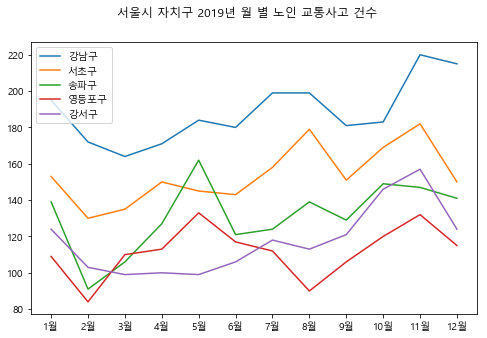

In [19]:
for i, val in enumerate(year_list):
    print(val)
    plt.figure()
    plt.figure(figsize=[8,5])
    for gu in list(df_top5_name.index):
        plt.plot(index, df_list[i].iloc[gu])
    title = '서울시 자치구 {}년 월 별 노인 교통사고 건수'.format(str(val))
    plt.suptitle(title)        
    plt.legend(['강남구','서초구','송파구','영등포구','강서구'])
    plt.show()

<Figure size 432x288 with 0 Axes>

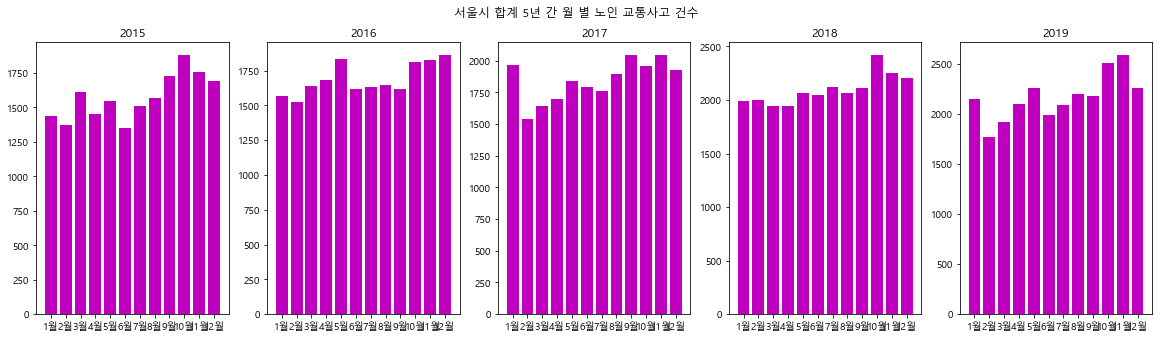

In [20]:
gu = 0
plt.figure()
plt.figure(figsize=[20,5])
for i, val in enumerate(year_list):
    plt.subplot(1,5,i+1).set_title(val)
    plt.bar(index, df_list[i].iloc[gu], color='m')
title = '서울시 {} 5년 간 월 별 노인 교통사고 건수'.format(df.iloc[gu,0])
plt.suptitle(title)        
plt.show()